<center><img src="Images/dice.png" alt="dice" style="width:200px"></center>

# The Numpy Random Package

[Official documentation](https://numpy.org/doc/stable/reference/random/index.html)

***

<br>

## Table of Contents

#### [1. Introduction](#Intro)

#### [2. Simple random data](#Simple-random-data)
&nbsp;&nbsp;&nbsp;&nbsp;[- Integers](#Integers)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[- Floats](#Floats)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[- Choice](#Choice)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[- Bytes](#Bytes)

#### [3. Permutations](#Permutations)
&nbsp;&nbsp;&nbsp;&nbsp;[- Shuffle](#Shuffle)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[- Permutation](#Permutation)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[- Permuted](#Permuted)

#### [4. Distributions](#Distr)
&nbsp;&nbsp;&nbsp;&nbsp;[- Normal](#Normal)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[- Uniform](#Uniform)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[- Binomial](#Binomial)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[- Multinomial](#Multinomial)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[- Geometric](#Geometric)<br>

#### [5. Seeds](#Seeds)


<br>
<a id="Intro"></a>

# <center>1. Introduction </center>
***

Random number generation has many applications in the real world such as gambling, statistics, computer simulation, cryptography and any other area that requires an unpredicatable outcome. Most applications use a pseudorandom number generator (PRNG) however, True Random Number Generators (TRNG) do exist. Such a device can generate random numbers via a physical process, such as radioactive decay or thermal noise in a semiconductor. Both instrinsically random processes as per quantum theory.[1] As most application do not rely on truly random generation, pseudorandom number generation is generally used. It is called pseudorandom because it relies on a determined value known as the seed. 

Numpy's random package produces pseudorandom numbers by combining a BitGenerator, which produces a sequence of random bits (typically 32 or 64 bits) and a Generator, that converts the sequence into a sequence of numbers. The Generator conforms to a particular probability distribution ie., uniform, Normal or Binomial. [2] Five such packages will be discussed in the "Distributions" section.

<a id="RS-v-Gen"></a>

#### Random State vs Generator

Generator replaces the legacy version Random State, since being updated in version 1.17.0. Random State legacy version is still be used however, it is limited to a single bitGenerator. Generator has multiple bitGenerators - meaning many distinct probability distributions are available for use. A further benefit of Generator is that by default it utilises bits that are produced by PCG-64, a 28-bit execution of O’Neill’s permutation congruential generator, which provides good statistical algorithms for generating random numbers that are difficult to predict.[3]

For the random generator documentation click here: [Random Generator Documentation](https://numpy.org/doc/stable/reference/random/generator.html)
### 

### Set up
***

#### Import libraries

In [289]:
# Numerical arrays.
import numpy as np

# Plotting data.
import matplotlib.pyplot as plt

# Nice plot style. 
import seaborn as sns

#### Set plot defaults

In [ ]:
# Set default plot style.
plt.style.use('fivethirtyeight')

# Set default figure size.
plt.rcParams['figure.figsize'] = [10, 6]

# Renders plots nicely in notebook.
%matplotlib inline

<br>

### Construct a Generator

***

The variable `rng` will be used in place of `np.random.generator` in code examples throughout this notebook for simplification.

In [376]:
# Create a new generator with bitGenerator PCG64. 
rng = np.random.default_rng(1) # Setting seed for reproducible results.

The integer value passed through as a parameter is known as a seed. Seeds will be discussed in more detail in section 5.

<br>

### References:
***

[1] RANDy - A True-Random Generator Based On Radioactive, Decay, Markus Rohe, Fortgeschrittenenpraktikum
Advisor: Ammar Alkassar
Security and Cryptography Research Group
Saarland University
SS 2003 https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.110.9725&rep=rep1&type=pdf

[2] https://numpy.org/doc/stable/reference/random/index.html accesed 2.11.21

[3] https://www.pcg-random.org/index.html accessed 2.11.21

<br>

<br>

<a id="#Simple-random-data"></a>


# <center>2. Simple random data</center>
#### <center><i>This section introduces numpy's built-in functions for producing random samples.</i></center>

<br>
<a id="Integers"></a>

# `integers()`

[Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers)

Generates random integer values. 
***

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`random.Generator.integers(low, high=None, size=None, dtype=np.int64, endpoint=False)`

The range is specified using the low and high parameters, the low value is inclusive while the high value is exclusive. The returned integers are from the discrete uniform distribution meaning each n value has equal probability of being returned.

<center><img src="Images/discrete_uniform.png" alt="dice" style="width:400px"></center>

[1]

In [291]:
# Random integer array.
rng.integers(low=0, high=10, size=100)

array([4, 5, 7, 9, 0, 1, 8, 9, 2, 3, 8, 4, 2, 8, 2, 4, 6, 5, 0, 0, 8, 7,
       8, 5, 8, 3, 4, 7, 1, 3, 1, 4, 9, 1, 3, 4, 9, 2, 5, 2, 0, 7, 0, 2,
       4, 4, 1, 9, 7, 9, 0, 7, 2, 5, 9, 2, 7, 1, 3, 9, 4, 5, 2, 1, 4, 6,
       4, 7, 3, 6, 7, 9, 4, 0, 7, 5, 8, 4, 3, 0, 4, 6, 7, 8, 2, 5, 8, 2,
       3, 8, 5, 5, 6, 5, 9, 7, 0, 1, 5, 8])

In [292]:
# A single random integer. 
rng.integers(0, 10, 1)

array([0])

<br>

### Specifying endpoint
***

With endpoint set to True the range of numbers is inclusive of high and low values.


In [293]:
# endpoint=True
ran_int = rng.integers(low=0, high=10, size=20, endpoint=True)
ran_int

array([7, 8, 8, 9, 2, 6, 8, 3, 2, 5, 0, 2, 9, 7, 9, 9, 9, 3, 5, 6])

<br>

### Default dytype
***

64 bits for high precision accuracy. However, 32 bits is sufficient for most functions. 

In [294]:
# Check the type of data the function produces.
type(ran_int[0])

numpy.int64

<br>

### Example: Roll a dice
***

<img src="Images/dice.jpeg" alt="dice" style="width:200px">

<br>

In [295]:
# Roll the dice 1000 times. 
rolls = rng.integers(1, 7, size=1000)

<AxesSubplot:ylabel='Count'>

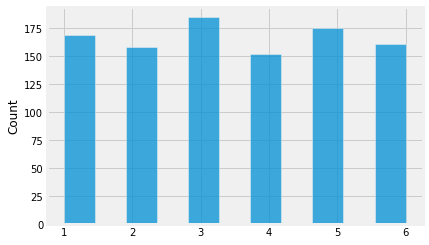

In [296]:
# Plot results.
sns.histplot(rolls)

As can be seen with the plot above, each side appeared a similar number of times after 1000 rolls (between 160 & 180 times each). This is typical of discrete uniform distribution, where the probability of occurances of events are equally possible within a finite range of values.

<br>

<a id="Floats"></a>

# `random()`

[Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random)

Generates random float values.

***

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`random.Generator.random(size=None, dtype=np.float64, out=None)`



In [297]:
# Generate a single floating point number with size parameter set to None
rng.random(size=None)

0.06909021073258215

In [298]:
# Generate an array of floats each using 32 bits of memory. 64 bits is default and used for high precisison. 
a = rng.random(size=100000, dtype=np.float32) # Default range is 0 - 0.9999. 

In [299]:
# Generate multiple arrays.
rng.random(size=(5, 5))

array([[0.72280032, 0.69292909, 0.30044938, 0.67553915, 0.68593969],
       [0.3119568 , 0.04255255, 0.62254896, 0.44470254, 0.04120844],
       [0.12480177, 0.54510201, 0.62564691, 0.08192362, 0.68602168],
       [0.54557776, 0.41036559, 0.97361332, 0.58834629, 0.83019335],
       [0.76849697, 0.5312257 , 0.83372515, 0.67992081, 0.0022397 ]])

<br>
<a id="Choice"></a>

# `choice()`

[Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice)

Generates a random sample from an array. 
***

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`random.Generator.choice(a, size=None, replace=True, p=None, axis=0, shuffle=True)`<br>


### Produce a sample from an array of strings
***

<br>

<img src="Images/choice.png" alt="make achoice" style="width:100px;">

The default for values returned is discrete uniform, similar to the integer function above, each value has the same probability of being returned. The example below illustrates this ie., a single value being chosen multiple times. 

Unlike the integer function, however, this setting can be changed as we will see with the `replace` parameter explanation at the end of this section.

In [300]:
# Choose a colour at random 10 times and plot results.
x = rng.choice(["yellow", "red", "blue", "green"], size=10)
x

array(['red', 'green', 'red', 'red', 'yellow', 'blue', 'blue', 'blue',
       'red', 'green'], dtype='<U6')


### Plot the choices
***

A visual representation of the selections made by the choice function. 

<AxesSubplot:title={'center':'No. of times colours selected'}, ylabel='Count'>

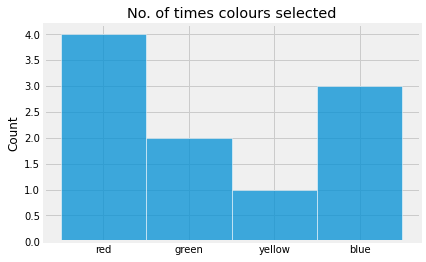

In [301]:
# Histogram plot of x.
plt.title("No. of times colours selected")
sns.histplot(x, bins=8, edgecolor='white')

<br>

### The `replace` parameter
***


`replace=True` is the default setting and means that for each random selection all of the original values are included in the array. This is the default setting and can be observed in the example above. 

`replace=False` after a selection is made, the selected value will not be placed back into the array.


In [302]:
# Array of colours.
colours = ["yellow", "red", "blue", "green", "purple", "black", "orange", "white"]

# Replace=False. 
y = rng.choice(colours, size=[8], replace=False)
y

array(['black', 'orange', 'blue', 'green', 'red', 'purple', 'white',
       'yellow'], dtype='<U6')

<br>

### Plot the choices
***

As can be seen below, each value can only be chosen once as it is removed from the array after its selection. 

<AxesSubplot:title={'center':'No. of times colours selected'}, ylabel='Count'>

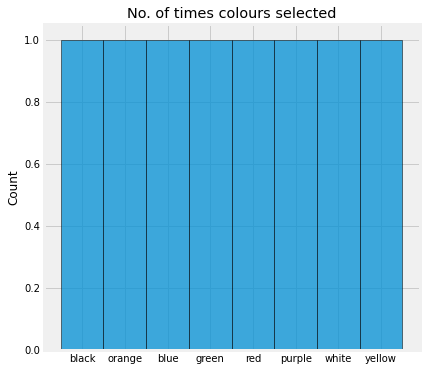

In [303]:
# Increase plot size. 
plt.rcParams['figure.figsize'] = [6, 6]

# Plot y on histogram. 
plt.title("No. of times colours selected")
sns.histplot(y, bins=8, edgecolor="black")

In [304]:
# Randomly selecting a single item from array.
rng.choice([1, 2, 3, 4, 5], size=1)

array([3])

## The `p` parameter
***

The `p` parameter allows the specification of probability of an item to be selected from the array. If the `p` parameter is not specified, the probability of selection is the same for each array item. That is, there is a uniform distribution of the data. The following code will show how the `p` parameter can be used to generate a non-uniform distribution sample. 

In [305]:
# Set the p parameter.
p = rng.choice(colours[0:2], size=20, p=[0.2, 0.8])
p

array(['red', 'yellow', 'yellow', 'red', 'red', 'red', 'yellow', 'red',
       'yellow', 'yellow', 'yellow', 'red', 'yellow', 'red', 'red', 'red',
       'red', 'red', 'yellow', 'red'], dtype='<U6')

In [306]:
# Code source: https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray

# Count the occurances of each colour in array. 
unique, counts = np.unique(p, return_counts=True)

# Place in dict object.
dict(zip(unique, counts))


{'red': 12, 'yellow': 8}

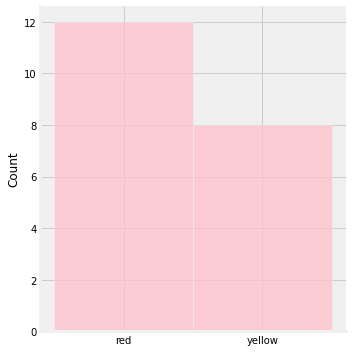

In [307]:
# Plot the results.
sns.displot(p, color="pink")

<br>

#### Difference between integers and choice functions:
***

While the random.Generator.integers and random.Generator.choice both choose select values (integers from a range, and choice from a given array), the significant differences bring that choice allows:

- the specification as to whether a replacement value placed in the array or not.
- the specificaton of probability of an item being selected.(uniform distribution is default) [2]

<br>
<a id="Bytes"></a>

## `bytes()`

[Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes)

Generates random bytes. 
***

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`random.Generator.bytes(length)`



This function simply returns a string of random bytes with the size of the return specified by the length parameter.

In [308]:
# Generate random bytes.
x = rng.bytes(10)
x

b'\x9ex\x89\xa4\x8e\xa5\x85~\xaa.'

In [309]:
# Check data type of x.
type(x)

bytes

<br>

### References:
***

[1] https://en.wikipedia.org/wiki/Discrete_uniform_distribution<br>
[2] https://stackoverflow.com/questions/55772716/how-is-numpy-choice-different-from-numpy-randint

***

<br>

<a id="Permutations"></a>

# <center>3. Permutations </center>

#### <center><i>A permutation is the number of ways a sequence can be arranged where ordering is significant. It can be compared to combinations, on the contrary, where ordering is insignificant.</i></center>


<br>
<a id="Shuffle"></a>
<center><img src="Images/card_shuffling_transparent.gif" alt="shuffle" style="width:300px"></center>

# `shuffle()`
[Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle)

Randomly shuffles items of a given array in-place.

***

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`random.Generator.shuffle(x, axis=0)`

Shuffling is uselful in applications where it is important to avoid bias. Machine learning often uses shuffling in its operations. 

<br>

### Shuffle 1-dimensional array
***

In [310]:
# Create a numpy array.
arr = np.arange(11)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [311]:
# Shuffle the array. 
rng.shuffle(arr)
arr

array([ 2,  3,  8,  5,  1,  4, 10,  0,  9,  6,  7])

<br>

### Shuffle 2-dimensional array.
***

In [312]:
# Generate 4 numpy arrays.
arr = np.arange(16).reshape((4, 4))

# Shuffle arrays. (Default axis = 0 & rearranges the rows)
rng.shuffle(arr)
arr

array([[ 4,  5,  6,  7],
       [12, 13, 14, 15],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3]])

<br>

### `axis` parameter
***

The axis default is 0. The following example illustrates the outcome when the axis is set to 1. 

In [313]:
# Generate multiple arrays.
arr = np.arange(64).reshape(8, 8)

# Shuffle with parameter axis=1(rearranges the columns). 
rng.shuffle(arr, axis=1)
arr

array([[ 2,  6,  4,  1,  0,  5,  7,  3],
       [10, 14, 12,  9,  8, 13, 15, 11],
       [18, 22, 20, 17, 16, 21, 23, 19],
       [26, 30, 28, 25, 24, 29, 31, 27],
       [34, 38, 36, 33, 32, 37, 39, 35],
       [42, 46, 44, 41, 40, 45, 47, 43],
       [50, 54, 52, 49, 48, 53, 55, 51],
       [58, 62, 60, 57, 56, 61, 63, 59]])

In [314]:
# Shuffle 3-dimensional array. 
arr = np.arange(8).reshape(2, 2, 2)
rng.shuffle(arr, axis=2)
arr

array([[[1, 0],
        [3, 2]],

       [[5, 4],
        [7, 6]]])

<br>
<a id="Permutation"></a>

# `permutation()` 

[Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation)<br>


Randomly permutates items of a array, leaving the original array unchanged and storing the permutation in a new variable. 

***


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`random.Generator.permutation(x, axis=0)`


### Pass integer as parameter
***

When an integer is passed through the function as x, it is treated as arange(x). 

In [315]:
# Permutates range from 0(inclusive) - 60(exclusive).
rng.permutation(60)

array([ 1, 26, 22, 32, 42, 51, 19, 34, 43, 14,  4,  9, 55, 48, 52, 46, 39,
       40, 12, 57,  7, 11, 30,  2, 56, 28, 54, 58,  6, 47, 29, 24, 31, 36,
       38, 35, 15, 41,  3, 49, 33, 20, 25, 53, 16, 45, 50, 21,  0, 37,  8,
       10, 59, 23, 44,  5, 27, 18, 17, 13])

<br>
### Pass array as parameter
***

In [316]:
# Generate numpy array. 
arr = np.arange(60)

# Makes a copy of array and permutates it. 
rng.permutation(arr)

array([ 3, 38, 16, 40, 53, 51, 14,  6,  2,  5, 47, 35, 48, 58, 27,  8, 44,
       21, 23, 36, 20, 10, 17, 13, 12, 28,  7, 22, 52, 11, 34, 26, 32, 59,
       49, 37, 30, 39, 15, 55, 31, 57,  9, 24, 29, 46, 18,  1,  0,  4, 19,
       41, 50, 43, 42, 33, 25, 54, 45, 56])

<br>

### Axis parameter
***

Like the shuffle function, the permutate function can be set to permutate along a given axis. The default is 0.

In [317]:
# Generate 2-dimensional array.
arr = np.arange(60).reshape(10, 6)
arr

# Axis=1 rearranges the columns. 
rng.permutation(arr, axis=1) # Note bulk permutation, slices are shuffled together, not independently. 


array([[ 0,  5,  4,  2,  3,  1],
       [ 6, 11, 10,  8,  9,  7],
       [12, 17, 16, 14, 15, 13],
       [18, 23, 22, 20, 21, 19],
       [24, 29, 28, 26, 27, 25],
       [30, 35, 34, 32, 33, 31],
       [36, 41, 40, 38, 39, 37],
       [42, 47, 46, 44, 45, 43],
       [48, 53, 52, 50, 51, 49],
       [54, 59, 58, 56, 57, 55]])

<br>
<a id="Permuted"></a>

# `permuted()`

[Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permuted.html#numpy.random.Generator.permuted)

Randomly permutates an array along a given axis.
***

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`random.Generator.permuted(x, axis=None, out=None)`

<br>

The shuffle and permuted functions may seems as though they fulfil the same function, however, the difference between the two is that with the permuted function the slices of the array are shuffled independently of each other.

In [318]:
# Produce permuted sample from array.
rng.permuted([1, 2, 3, 4, 5])

array([1, 2, 3, 4, 5])

In [319]:
# Generate multiple arrays.
x = np.arange(50).reshape(10,5)
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49]])

<br>

### Slices are shuffled independently 
***

Unlike the permutation function, the slices are shuffled independently meaning that values within a slice are also shuffled. 

In [320]:
# Permute array along axis 1. 
rng.permuted(x, axis=1, out=None)

array([[ 0,  2,  4,  1,  3],
       [ 8,  6,  9,  5,  7],
       [12, 11, 13, 10, 14],
       [15, 17, 16, 18, 19],
       [20, 21, 24, 23, 22],
       [26, 25, 28, 29, 27],
       [31, 30, 33, 32, 34],
       [35, 36, 39, 38, 37],
       [44, 41, 40, 43, 42],
       [45, 46, 49, 48, 47]])

In [321]:
rng.permuted(x, axis=None, out=None)

array([[28, 15, 20, 37, 31],
       [42, 13,  6, 41,  5],
       [ 0, 43, 24, 35, 38],
       [36, 19, 26, 11, 27],
       [46, 14, 22, 34, 17],
       [30,  4, 47,  7, 25],
       [32, 45, 48, 23, 49],
       [33, 10, 39, 44, 40],
       [ 1, 18,  2, 21, 29],
       [12,  3,  9,  8, 16]])

<br>

### Differences between the shuffle, permutation & permuted functions
***

Regarding memory usage, the shuffle function uses in-place memory and the permutation function returns a copy of the array (out-of-place memory). With the permuted function, on the other-hand, whether the return be in-place or out-of-place can be specified with the `out` parameter.[1]

Both the shuffle and permutation functions deals with slices of a given axis as if they are 1-dimensional arrays, while the purmuted function treats each slice independent of the other. I.e, Where axis=1 the columns will be shuffled. the permutation function will return the shuffled columns while keeping the same values in column whereas, the permuted function will also shuffle the items within the column. 

<br>

#### References:

[1] https://numpy.org/doc/stable/reference/random/generator.html


<br>
<a id="Distr"></a>


# <center>4. Distributions</center>
***



## Continuous Distributions

### Normal, uniform
***

<br>
<a id="Normal"></a>

## `normal()` 

[Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal)

Generate random samples from the Gaussian normal distribution.
***


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`random.Generator.normal(loc=0.0, scale=1.0, size=None)`

The probability distribution function of the normal distribution (or Gaussian distribution) is also known as the bell curve due to its distinctive bell-like shape. Normal distribution is a phenomenon that often found in nature and is used frequently in probability problems. It is a symmetrical representation of data which focuses on the mean and standard deviation, in which most of the values lie, while the remaining values taper off gradually. [1]

<br>

[Image source](https://www.google.com/search?q=normal+distribution&tbm=isch&source=iu&ictx=1&fir=PdECETJk-Nz0eM%252CNTVbhD7-dDkldM%252C_%253BtfalmXQH_1OaOM%252CIHBRA5u2SVyimM%252C_&vet=1&usg=AI4_-kQ6iJynd96JVmTgWJWK3JCHcMzbRg&sa=X&ved=2ahUKEwiIzbSHo7v0AhURYcAKHfCHDzgQ_h16BAhcEAE#imgrc=tfalmXQH_1OaOM)

<center><img src="Images/gaussian.png" alt="gaussian" style="width:500px"></center>

<br>

The image above depicts the normal distribution, note the bell curve characteristic of the Gaussian ot normal distribution. The line in the middle of the curve represents the mean, while each line to the right or left of the mean represents a standard deviation. 

Paraphrase this! "Standard deviation is the measure of dispersion of a set of data from its mean. It measures the absolute variability of a distribution; the higher the dispersion or variability, the greater is the standard deviation and greater will be the magnitude of the deviation of the value from their mean."[https://economictimes.indiatimes.com/definition/standard-deviation]

One standard deviation from the mean represents 68.27 percent of the data. 

95 percent of the data is within two standard deviations from the mean. [2]


<br>

#### Formula
***

<center><img src="Images/guassian_formula.png" alt="dice" style="width:500px"><center>

<br>

Reference this!

#### Parameters
***

The `loc` parameter specifies the mean of the data, the default value is 0 if no value is given.

The `scale` parameter specifies the standard deviation of the normal distribution. 

While the `size` parameter specifies how many data points will be generated. 

<br>

#### Generate normal samples
***

In [322]:
# Generate a single normal value with default parameter values.
rng.uniform()

0.08655323186446906

In [323]:
# Generate 5000 normal values with loc & size settings.
a = rng.normal(loc=50, size=10000)

In [324]:
# Check the mean.
a.mean()

49.99203400891793

In [325]:
# Check the standard deviation. 
a.std()

0.9941134162342693

#### The default standard deviation for the normal function is set to around 1 which represents approximately 68 percent of the data. 

<AxesSubplot:ylabel='Count'>

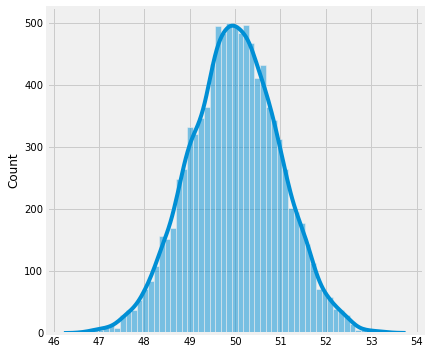

In [326]:
# Plot data on histogram with kernal density estimation. 
sns.histplot(a, kde=True)

<br>

#### Specify scale
***

#### <i> Example: IQ Tests.</i> 

[3]

Assume the mean of IQ results are 100. Set the `loc` parameter to the mean IQ of 100.<br>
Assume the standard deviation is 15: Set `scale` to 15. <br>
The `size` in this case are the subjects(people), this is set to 1,000,000.

In [327]:
# Specify mean & standard deviation.
m = 100
s = 15

# Produce 1,000,000 normally distributed values.
x = rng.normal(loc=m, scale=s, size=1000000)

In [328]:
# Check the size of output array.
x.size

1000000

In [329]:
# Check standard deviation. 
x.std()

14.979202474034036

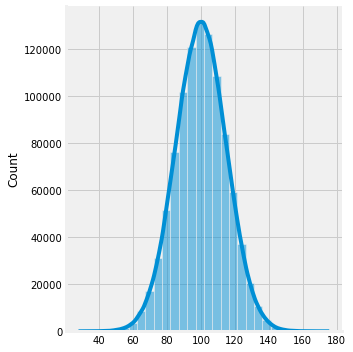

In [330]:
# Plot the data with kernal density estimation. 
sns.displot(x, kde=True, bins=30)

In [331]:
# Check highest value.
np.amax(x)

175.60651203956832

In [332]:
# Check lowest value. 
np.amin(x)

27.804421860332667

### Subplots with different scale values
***

In [333]:
# Create normal arrays specifying different scale values.
a = rng.normal(loc=0, scale=3.0, size=1000)
b = rng.normal(loc=0, scale=1.0, size=1000)

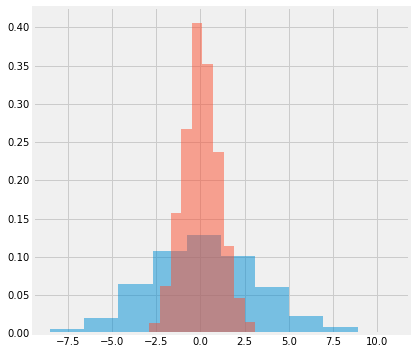

In [334]:
# Create a pyplot figure. 
fig, ax = plt.subplots()

# Plot values with histogram. 
ax.hist(a, alpha=0.5, density=True)   # alpha parameter makes bins transparent.
ax.hist(b, alpha=0.5, density=True);  # density=true returns a probability density.

#### As seen in the plot scale affects the spread of the data. 

- "a" array (BLUE) has a bigger spread. 99 percent of the data lies beyween -9 and 9 (3 standard deviations).

- "b" array (ORANGE) has a smaller spread. 99 percent of the data lies between -3 and 3 (also 3 standard deviations).

<br>
<a id="Uniform"></a>

## `uniform()` 

[Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.uniform)

Generate random samples from the uniform distribution. 

***

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`random.Generator.uniform(low=0.0, high=1.0, size=None)`

Samples returned from this function "are uniformly distributed over the half-open interval [low, high)".[4] That is, that any value within the given range has equal probability of being selected. The low parameter value is included, however, the high value is excluded, denoted by the closed bracket before the low parameter and an open round bracket after the high parameter. That is, values very close to the upper bound can be returned but the high value will not be returned.

As the values are within a range it is said to be a continuous distribution. 
When dealing with discrete values (i.e., arrays of values), Numpys's integers function would be suitable.

Uniform distribution is used for calculating possibilities. This distributions is also known as rectangular distribution owing to its rectangular shape, see figure below.

<br>

#### Continuous uniform distribution function
***

<center><img src="Images/Uniform_Distribution.svg" alt="uniform distribution" style="width:500px"><center>[5]

<br>

In [335]:
# Generate single number using default parameters.
rng.uniform() # The default low value is 0, while the high value is 1. 

0.7807379075973154

In [336]:
# Generate 100 numbers within default range.
rng.uniform(size=100)

array([0.24391387, 0.99187376, 0.7891139 , 0.35331233, 0.10335344,
       0.58102587, 0.28429775, 0.92974366, 0.56569098, 0.53479728,
       0.5161733 , 0.22371929, 0.61852185, 0.59957081, 0.99029115,
       0.55993696, 0.96200759, 0.6987523 , 0.99825962, 0.52573655,
       0.09024357, 0.10253482, 0.24623435, 0.70452098, 0.10692229,
       0.21433134, 0.9026523 , 0.12094584, 0.77253669, 0.33806114,
       0.58468307, 0.34883651, 0.30014554, 0.88034926, 0.87109442,
       0.22290195, 0.77075369, 0.01068921, 0.48220248, 0.88747136,
       0.15336565, 0.70793293, 0.05172696, 0.95118761, 0.62366734,
       0.38626239, 0.94663576, 0.74446383, 0.28858196, 0.55358619,
       0.17280494, 0.52991398, 0.70876242, 0.54620284, 0.1241104 ,
       0.90619128, 0.21827776, 0.5948997 , 0.72211086, 0.05460384,
       0.12662166, 0.55663081, 0.24290954, 0.01748333, 0.1723834 ,
       0.7574678 , 0.21339594, 0.06208425, 0.86839919, 0.87158766,
       0.95127001, 0.82489013, 0.83174047, 0.12539266, 0.02779

#### Note how the high value is excluded.

In [337]:
# Generate sample specifying range. 
x = rng.uniform(low=10, high=100, size=10000)
x

array([26.93004732, 33.63078399, 14.1717268 , ..., 18.85747066,
       14.17424324, 17.28143333])

<AxesSubplot:ylabel='Count'>

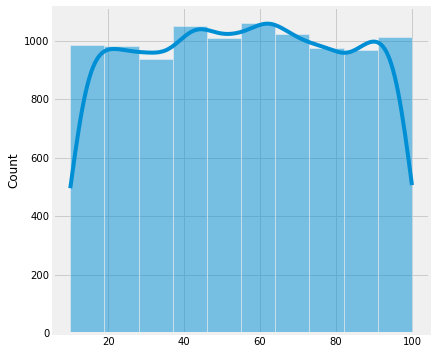

In [338]:
# Plot results with kernal density estimation. 
sns.histplot(x, kde=True, bins=10)

In [339]:
# Highest value
np.amax(x)

99.99885621138476

In [340]:
# Lowest value
np.amin(x)

10.008831408625818

<br>

#### <i> Example: Deck of cards
    
<img src="Images/deck_cards_uniform.png" alt="card deck" style="width:200px">

***    
    
- Consider a deck of 52 cards. 
    
- The following code will draw a card from the deck 100,000 times. 
    
- As each card is unique, the probability of pulling any card from the deck is equally likely. 
    
See the results below!

In [341]:
# Create uniform distribution.
cards = rng.uniform(1, 53, 100000)

<AxesSubplot:ylabel='Count'>

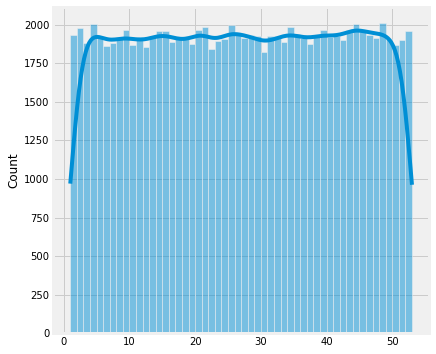

In [342]:
# Plot occurances of cards. 
sns.histplot(cards, bins=52, kde=True)

After 100,000 pulls from the deck, we can see that each card was selected a similar number of times. 

Note: <b>the rectangler shape</b> characteristic of a uniform distribution. 


<br>

# Discrete Distributions
## Binomial, Multinomial
***

<br>
<a id="Binomial"></a>

# `binomial()`
[Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial)

Generate random samples from a binomial distribution. 
***

"The binomial distribution is a probability distribution that summarizes the likelihood that a value will take one of two independent values [typically 0 and 1] under a given set of parameters or assumptions."[6] We assume that for each trial there is just one outcome and further, that the probability of success for each trial is the same. Binomial distribution is a commonly used discrete distribution in statistics. 

### Formula
***

<center><img src="Images/binomial_dist_formula.png" alt="bonomial formula" style="width:350px"></center>[7]


### Parameters

There are two non-optional parameters:
- `n` must be integer or list of integers
- `p` is specifies the probability of success. It must be a value between 0 and 1. 

### Flip a coin simulation
***

<center><img src="Images/coin_toss.png" alt="coin toss" style="width:150px"></center>


The possible outcome `n` is either 0 or 1 (heads or tails) and the probability of it being either heads or tails is 50/50 as specified with `p`.

In [343]:
# Flip a coin 1,000 times. 
coin = rng.binomial(n=1, p=0.5, size=1000)

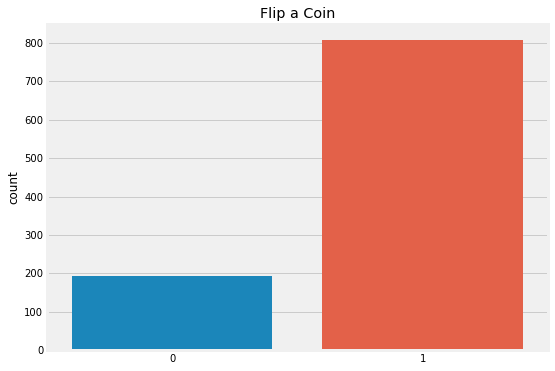

In [359]:
# Plot results with a count plot. 
plt.title("Flip a Coin")
sns.countplot(x = coin);

#### As we can see, each side appeared a similar number of times.

### Change probability `p`
***

In [345]:
# Flip a coin 1,000 times. 
coin = rng.binomial(n=1, p=0.8, size=1000)

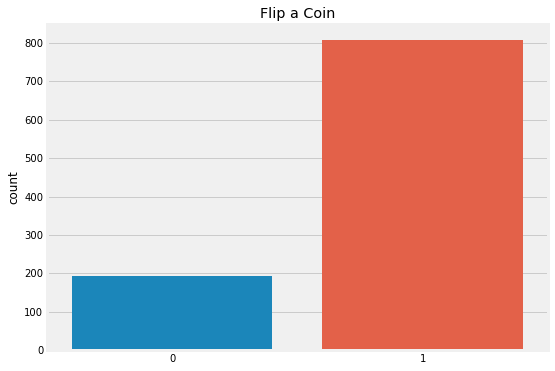

In [360]:
# Create a histogram with coin toss array.
plt.title("Flip a Coin")
sns.countplot(x = coin);

#### The probability of one side of the coin appearing is 20/80.

In [347]:
# Check number of times each side occured. 
faces, counts = np.unique(coin, return_counts=True)
faces, counts

(array([0, 1]), array([192, 808]))

In [348]:
# View the percentages of occurances of heads vs tails.
percent = dict(zip(faces, counts * 100 / len(coin)))
percent

{0: 19.2, 1: 80.8}

<br>
<a id="Multinomial"></a>

# `multinomial()`
[Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.multinomial.html#numpy.random.Generator.multinomial) <br>
Generate random samples from a multinomial distribution. 
***

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`random.Generator.multinomial(n, pvals, size=None)`


The multinomial probability distribution is a generalised version of the binomial distribution. However, the possible outcomes can be greater than two.

## Simulate throwing dice
***

In [366]:
# Probability of throwing the dice and landing on a given side. 
p = [1/6]

# Number of trials (throws).
n = 60

In [367]:
# Generate a sample from p & n values, throw 1 dice. 
count = rng.multinomial(n, pvals=p*6, size=1)

In [368]:
# Show result.
count

array([[16,  9, 11,  8,  9,  7]])

The first item in the array represents the first face, the second item, the second face etc...

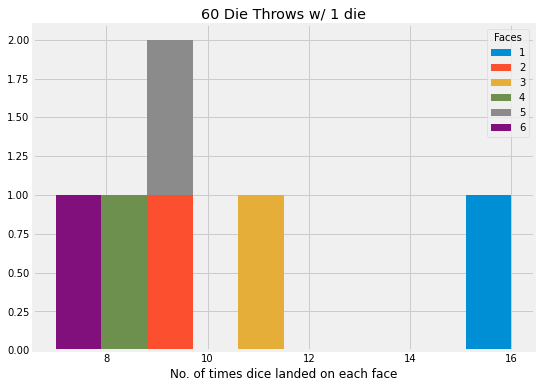

In [369]:
# Plot results.
plt.rcParams["figure.figsize"] = (8,6)
fig, ax = plt.subplots()

plt.title("60 Die Throws w/ 1 die")
plt.xlabel("No. of times dice landed on each face")
ax.hist(count, histtype="barstacked");

faces = ['1', '2', '3', '4', '5', '6']
plt.legend(faces, title="Faces");

## The `size` parameter
***

In [370]:
# Generate a sample from p & n values above, throw 2 dice this time. 
count = rng.multinomial(n, pvals=p*6, size=2)

In [371]:
# Check the count. 
count

array([[ 9, 12, 10, 11, 10,  8],
       [ 7, 13, 13,  8, 10,  9]])

The first row represents the first dice and 60 throws of it. While each item in the row represents how many times the die landed on that face. (The first item represents face one, the second item, face two etc...)

The second row represents the second dice and 60 throws of it and how many times the second die landed on each face. 

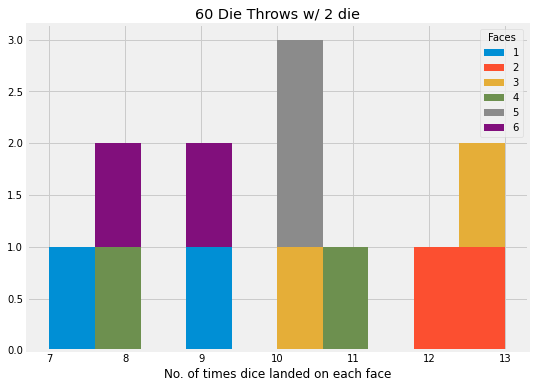

In [372]:
# Plot results.
plt.rcParams["figure.figsize"] = (8,6)
fig, ax = plt.subplots()

plt.title("60 Die Throws w/ 2 die")
plt.xlabel("No. of times dice landed on each face")
ax.hist(count, histtype="barstacked");

faces = ['1', '2', '3', '4', '5', '6']
plt.legend(faces, title="Faces")

There are now <b>TWELVE</b> possibilites rather than six.

This is because <b>TWO dice</b> are being rolled. 

That is, there are two opportunities to land on one, two opportunities to land on two, two opportunities to land on three etc...

<br>
<a id="Geometric"></a>

# `geometric()`
[Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.geometric.html) <br>
Generate random samples . 
***

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`random.geometric(p, size=None)`

The geometric probability distribution represents the number of trials neccessary for a successful event to occur in a Bernoulli trial.[8] A Bernoulli trial is also known as a binomial trial and as mentioned above, it is a random experiment where only two outcomes are possible, namely, success or failure.

#### Formula:
<center><img src="Images/geometric_formula.png" alt="geometric formula" style="width:250px"></center>



#### Parameters:
***

- `p` represents the probability of a successful event.
- `size` (<i>k</i>) is the number of trials that must be run in order to achieve success.

<br>

#### Geometric problem example:
Source: [The Organic Chemistry Tutor](https://www.youtube.com/watch?v=d5iAWPnrH6w&t=369s)<br>
***
<img src="Images/blue_car.png" alt="car" style="width:150px">

<br>

#### Q:  15% of all cars passing along a certain road are blue. What is the probability that the 200th car will be the first blue car that you see passing along this road? 

<br>

In [356]:
# Probability of the car being blue.
p = 0.15

# Number of trials.
size = 200

# Draw 200 values from the geometric distribution.
geo = rng.geometric(p, size)
geo

array([ 6,  6,  6,  5,  6,  7,  1,  6,  1, 14,  9,  7,  5,  5,  2, 16, 25,
        3,  7,  2,  7,  3,  8,  6,  2, 21,  5,  2, 25,  8,  2, 10,  2,  1,
        8,  3,  9,  9,  1,  1,  3,  9, 13,  8, 25,  2,  1,  9,  8,  3,  2,
        5,  9,  9,  3,  2,  4,  3, 26,  4, 20, 13,  9, 12,  8,  7,  1,  1,
        9, 11,  3,  1,  1,  1,  7, 10,  8, 16,  1,  4,  4,  6,  7,  4,  6,
        3, 11,  5,  6, 15,  5,  5,  1,  5,  2,  4,  4,  1,  4,  8, 25,  9,
        4,  2, 19,  3,  2,  3,  3,  7,  5,  3, 10, 25,  2,  2,  1,  5,  5,
        1,  1,  3, 19,  9,  1,  2,  4,  7,  8, 14,  1,  7,  5,  1,  6,  1,
        1,  8,  5,  4,  1,  4,  5,  9,  6, 24,  6,  2, 10,  6,  9,  1,  4,
        1, 11,  1, 16, 24,  9, 11, 11, 11,  5,  9,  6,  1,  1,  1,  8,  1,
        5,  6, 14, 13,  1, 12,  1,  2, 11,  4,  3, 20,  5,  3,  1, 14,  6,
        6,  4,  1, 10,  4,  4,  5, 10,  4,  1,  3,  9,  3])

In [357]:
# Successful trials.
(geo == 1).sum() / 200

0.175

#### Probability of success
***
The figure returned above is the probability that the 200th car will be blue.

<br>

#### Plot the geometric probability distribution
***

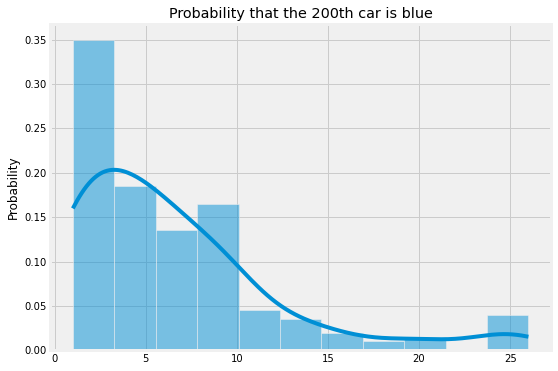

In [358]:
# Plot the data from geometric probability distribution. 
plot = sns.histplot(geo, kde=True, stat="probability")
plot.set(title='Probability that the 200th car is blue', ylabel = 'Probability');

<br>

#### References:
***
[0] https://economictimes.indiatimes.com/definition/standard-deviation

[1] https://studiousguy.com/real-life-examples-normal-distribution/

[2] https://towardsdatascience.com/understanding-the-68-95-99-7-rule-for-a-normal-distribution-b7b7cbf760c2

[3] https://mathstat.slu.edu/~may/ExcelCalculus/sec-7-6-NormalDistribution.html

[4] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform

[5] https://en.wikipedia.org/wiki/Continuous_uniform_distribution

[6] https://www.investopedia.com/terms/b/binomialdistribution.asp

[7] https://en.wikipedia.org/wiki/Binomial_distribution

[8] https://deepai.org/machine-learning-glossary-and-terms/geometric-distribution
***

<br>

<a id="Seeds"></a>
<center><img src="Images/seed.png" alt="car" style="width:250px"></center>

# <center>5. Seeds</center>

A random seed, also known as a seed state, is a piece of data (usually a number), used to format a pseudo-random number generator. The purpose of a seed is to yield pseudo-random data that can be reproduced. The seed value itself does not need to be random, however, it will be ignored when generating values. The values generated will be processed from a probability distribution conforming to a pseudo-random process. The seed determines the sequence of random number generation, therefore, if the same seed is entered to initialise the generator, the output of the generator will be the same each time. "Reproducibility is a very important concept that ensures that anyone who re-runs the code gets the exact same outputs."[1] Choosing a good random seed is critical in computer security. For instance, consider an encryption key that is generated using pseudo-random methods. If the seed is known one can access the key.[2] 

<br>

### `defaults_rng()`
[Documentation](https://numpy.org/doc/stable/reference/random/generator.html)
***

In the introduction section of this notebook, an instance of the Numpy's default Generator PCG64 was created using the function `numpy.random.defaults_rng()`. This function has one parameter `seed`, which can be an integer value, SeedSequence, BitGenerator, Generator or None. The `default_rng()` initialises the BitGenerator which "provides a stream of random bits based on different algorithms.[3] If no seed is specified the operating system will refer to a state (usually a number) in memory and use it as the seed each time the function is called. Time is often used to set the seed.

In [440]:
# Create a generator with bitGenerator PCG64. 
rng = np.random.default_rng(seed=42)

In [441]:
# Default generator type.
rng

Generator(PCG64) at 0x1335A6900

In [445]:
# Create a random sample.
rng.random((5, 5))

array([[0.19463871, 0.466721  , 0.04380377, 0.15428949, 0.68304895],
       [0.74476216, 0.96750973, 0.32582536, 0.37045971, 0.46955581],
       [0.18947136, 0.12992151, 0.47570493, 0.22690935, 0.66981399],
       [0.43715192, 0.8326782 , 0.7002651 , 0.31236664, 0.8322598 ],
       [0.80476436, 0.38747838, 0.2883281 , 0.6824955 , 0.13975248]])

- Because the seed parameter was specified, the items generated will always be the same after re-starting the kernel.

#### Generate the same numbers
***

In [443]:
rng = np.random.default_rng(seed=42)
rng.random((5, 5))

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803, 0.09417735],
       [0.97562235, 0.7611397 , 0.78606431, 0.12811363, 0.45038594],
       [0.37079802, 0.92676499, 0.64386512, 0.82276161, 0.4434142 ],
       [0.22723872, 0.55458479, 0.06381726, 0.82763117, 0.6316644 ],
       [0.75808774, 0.35452597, 0.97069802, 0.89312112, 0.7783835 ]])

<br>

## References:
***

[1] https://medium.com/geekculture/the-story-behind-random-seed-42-in-machine-learning-b838c4ac290a accessed 4.11.21 <br>
[2] https://www.bbc.com/news/technology-33839925
[3] https://numpy.org/doc/stable/reference/random/bit_generators/generated/numpy.random.BitGenerator.html

***

## End